Beschrijving van de dataset

Deze dataset is kunstmatig gecreëerd en richt zich op het voorspellen van landbouwoogsten. Het simuleert omstandigheden op basis van diverse milieu- en managementfactoren. Het doel is het bieden van een oefenomgeving voor het ontwikkelen van voorspellende modellen in de context van landbouw, machine learning en regressieanalyse.

Dit Python-script maakt gebruik van de pandas-bibliotheek om de gegevens in te lezen vanuit het CSV-bestand genaamd "agricultural_yield_train.csv". De gegevens worden opgeslagen in de variabele `ay_data`. Door de `head()`-functie te gebruiken, worden de eerste paar rijen van de dataset weergegeven. Dit geeft een snel overzicht van de structuur en inhoud van de gegevens.

In [1]:
import pandas as pd

ay_data = pd.read_csv("../csv/agricultural_yield_train.csv")
ay_data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


Dit Python-script bereidt gegevens voor machine learning voor door features (`X`) en een targetvariabele (`y`) te definiëren. De features worden gedefinieerd als alle kolommen behalve `"Seed_Variety"` in het DataFrame `ay_data`, en de targetvariabele (`y`) wordt ingesteld op de kolom `"Seed_Variety"`.

In [2]:
X = ay_data.drop(["Seed_Variety"], axis=1)
y = ay_data["Seed_Variety"]

X, y

(       Soil_Quality  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
 0         96.415657                        147.853040   94.593926   
 1         92.352626                        281.565396   90.504644   
 2         63.714785                        137.864940   97.329340   
 3         90.084256                        100.946659  113.404828   
 4         81.600341                        223.088908   83.048176   
 ...             ...                               ...         ...   
 15995     77.053550                        154.189768  103.115855   
 15996     99.795631                        282.295839  123.598354   
 15997     67.478487                        120.017122  102.308627   
 15998     85.176890                        247.847389  114.956634   
 15999     87.838280                        244.216536   98.313738   
 
        Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
 0       444.267569                    3            683.759119  
 1       517.585491         

Dit Python-script maakt gebruik van de `train_test_split`-functie uit de scikit-learn bibliotheek om een dataset op te splitsen in training- en testsets. De features (`X`) en de bijbehorende targetvariabele (`y`) worden als invoer gegeven. De resulterende datasets, `X_train`, `X_test`, `y_train`, en `y_test`, worden gebruikt voor het trainen en evalueren van de modellen. De parameter `test_size=0.2` geeft aan dat 20% van de gegevens wordt toegewezen aan de testset, terwijl 80% wordt gebruikt voor training. De parameter `random_state=0` zorgt voor reproduceerbaarheid van de splitsing. Met toevoeging van `stratify=y` wordt de parameter `stratify` toegepast, wat betekent dat de verdeling van klassen in de targetvariabele (`y`) behouden blijft in zowel de training- als de testset. Dit is vooral relevant bij classificatietaken met ongebalanceerde datasets, waarbij het behoud van dezelfde klasseverdeling in beide sets belangrijk is om de representativiteit van de data te waarborgen.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Dit Python-script maakt gebruik van het scikit-learn framework om een logistiek regressiemodel te creëren en te trainen. Eerst wordt de LogisticRegression-klasse geïmporteerd. Vervolgens wordt een instantie van dit model geïnitialiseerd. Daarna wordt het model getraind met behulp van de trainingsdata (`X_train` en `y_train`). Tijdens het trainingsproces past het model de parameters aan om de relatie tussen de features en de targetvariabele te leren, waardoor het klaar is voor het maken van voorspellingen op nieuwe data.

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\anaconda3\envs\b2c3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Dit Python-script maakt gebruik van een getraind logistiek regressiemodel om voorspelde waarden te genereren voor de positieve klasse op basis van de testdataset `X_test`. Daarna wordt een drempelwaarde van 0.5 ingesteld, waarmee wordt bepaald of een voorspelde waarschijnlijkheid als positief of negatief moet worden beschouwd. De drempelcorrectie wordt toegepast door alle waarschijnlijkheden gelijk aan of groter dan 0.5 om te zetten naar 1 en de rest naar 0. De resulterende array, `y_pred_changed`, bevat aangepaste voorspelde klasselabels op basis van de ingestelde drempelwaarde.

In [5]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

treshold = 0.5

y_pred_changed = (y_pred_proba >= treshold).astype(int)
y_pred_changed


array([1, 0, 1, ..., 1, 1, 1])

Dit Python-script genereert scatterplots voor elke feature (kolom) in de dataset, met uitzondering van `"Seed_Variety"`. In deze scatterplots wordt de x-as ingenomen door de waarden van de specifieke feature, terwijl de y-as de aangepaste voorspelde klasselabels (`y_pred_changed`) vertegenwoordigt. Bovendien wordt voor elke scatterplot een rode logistieke regressie lijn toegevoegd. Deze lijn geeft de geschatte kans weer dat een voorbeeld tot de positieve klasse behoort.

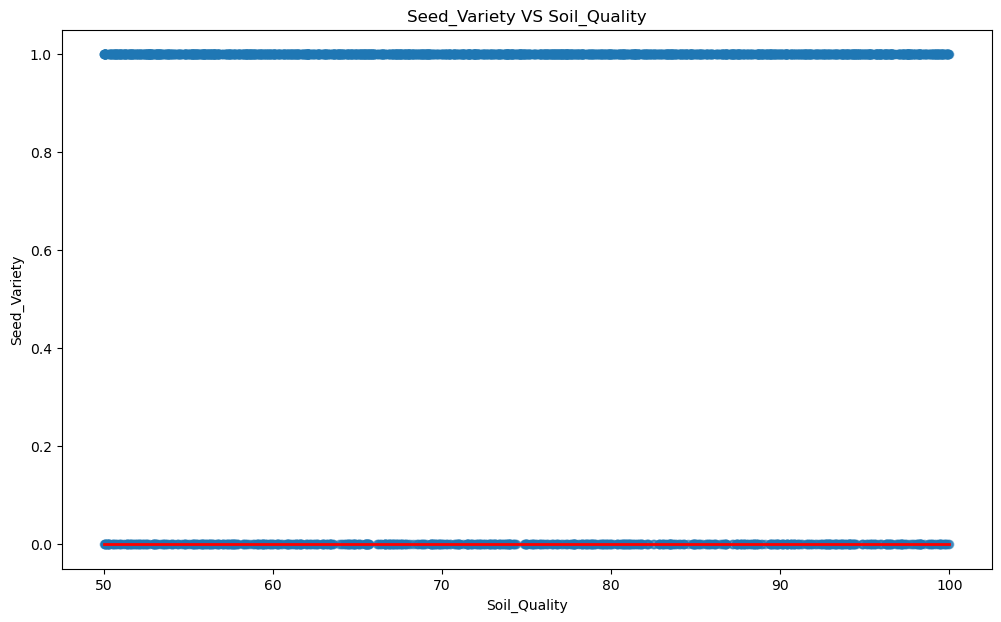

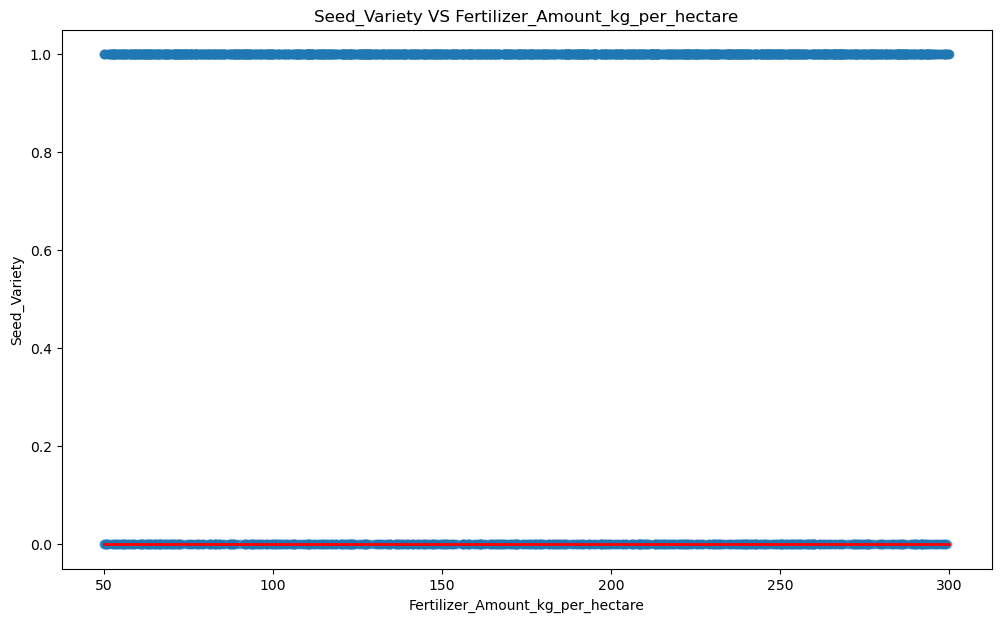

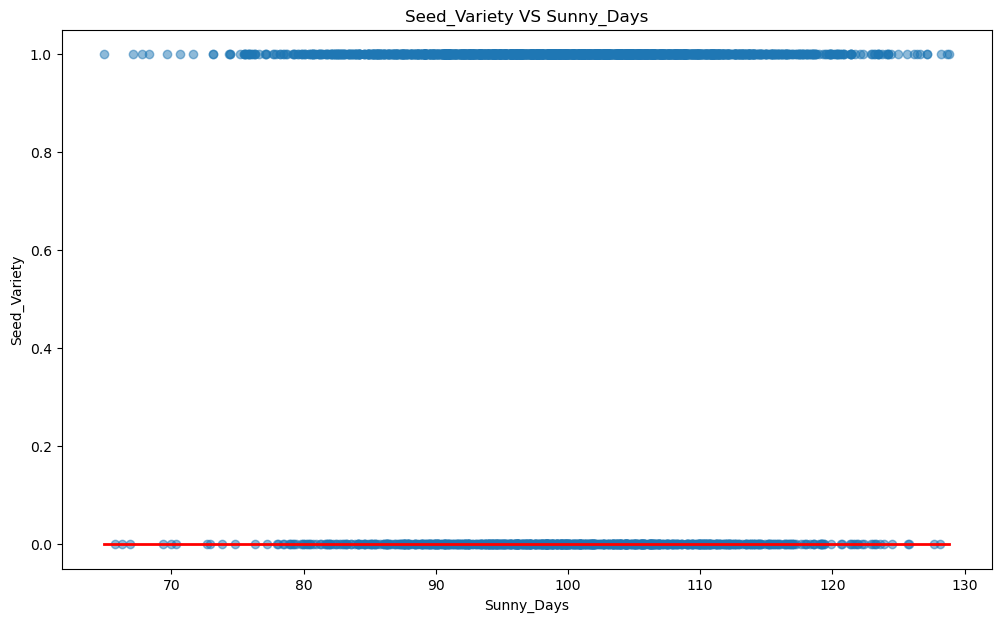

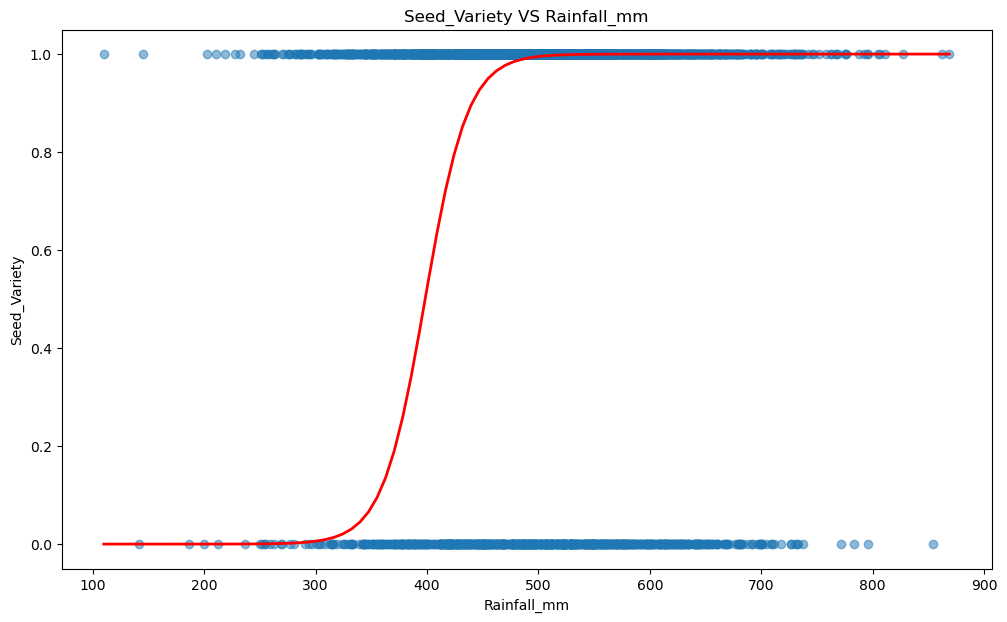

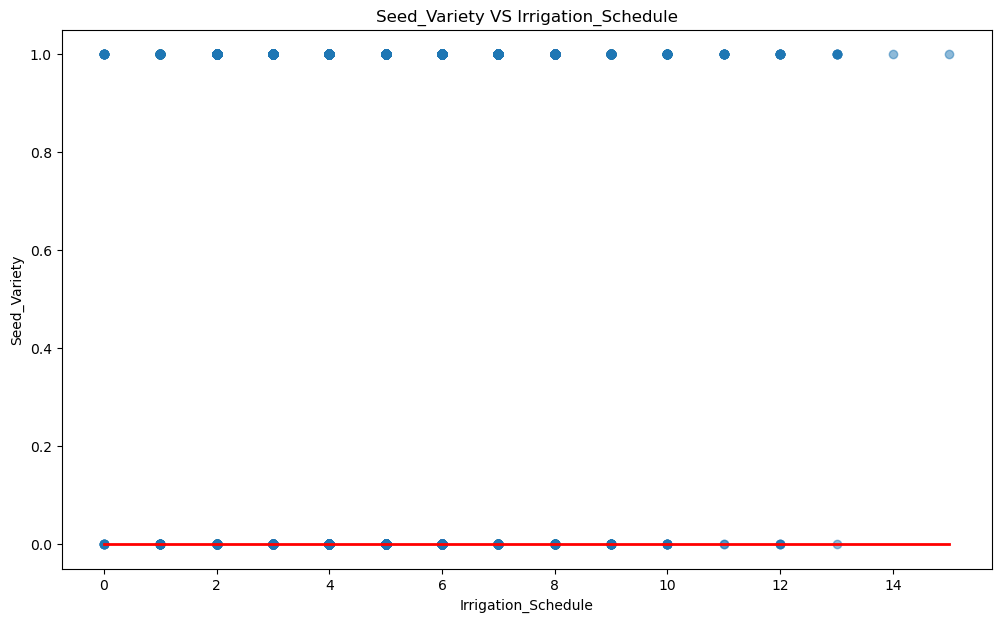

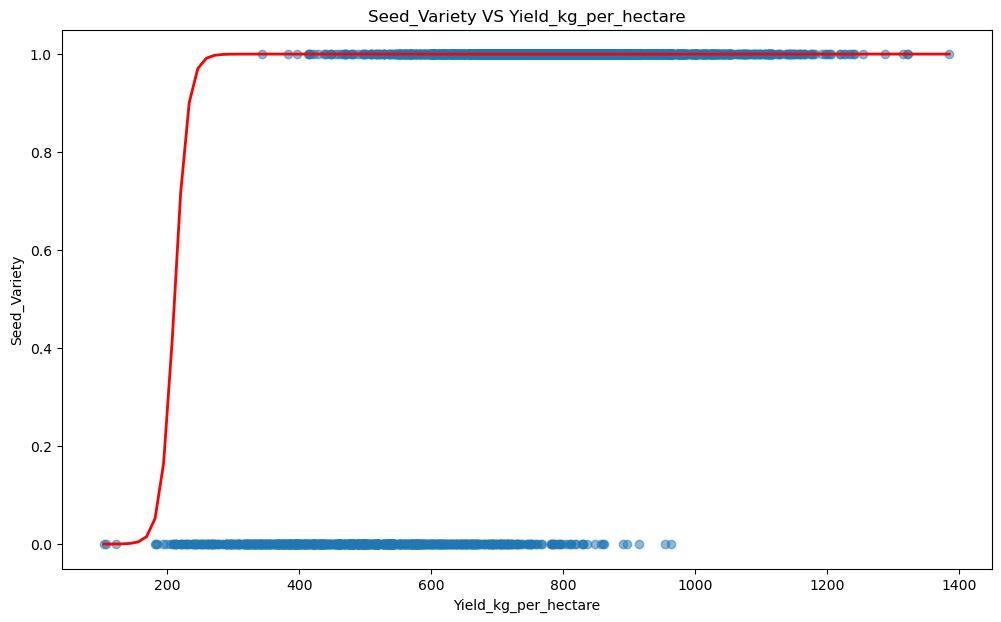

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for feature in X.columns:
    if feature != "Seed_Variety":
        plt.figure(figsize=(12, 7))
        plt.scatter(X_test[feature], y_pred_changed, alpha=0.5, label='Scatterplot')
        
        # Voeg logistieke regressiecurve toe
        X_range = np.linspace(X_test[feature].min(), X_test[feature].max(), 100)
        y_logit = model.coef_[0][X.columns == feature] * X_range + model.intercept_
        y_proba = 1 / (1 + np.exp(-y_logit))
        plt.plot(X_range, y_proba, color='red', linewidth=2, label='Logistieke Regressiecurve')
        
        plt.xlabel(feature)
        plt.ylabel("Seed_Variety")
        plt.title(f"Seed_Variety VS {feature}")
        plt.show()
        

Voordat dit code blok uitgevoerd kan worden moet deze extensie worden toegevoegd (zie afbeelding) als de b2c3 kernel gebruikt word. Op de base kernel werkt het wel! 

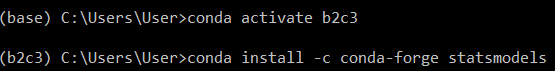


Dit Python-script voert een logistische regressieanalyse uit op de gegeven dataset. Eerst wordt een constante term toegevoegd (`X`) aan de featurematrix voor de intercept in het logistische regressiemodel. Vervolgens wordt een logistiek regressiemodel geïnitialiseerd (`model`) en aangepast aan de data. De samenvatting van het model, afgedrukt via `print(model.summary())`, bevat essentiële statistieken zoals p-waarden en coëfficiënten van de modelparameters. Dit biedt waardevol inzicht in de relatie tussen de features en de kans op een binair resultaat in de targetvariabele.

In [7]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.Logit(y, X).fit() 
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.002913
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:           Seed_Variety   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.9952
Time:                        14:56:44   Log-Likelihood:                -46.603
converged:                       True   LL-Null:                       -9746.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -26.4568      4.591     -5.7

Conclusie

Samenvattend onthult de uitgevoerde logistische regressie een opvallend hoge voorspellende kracht met een R-kwadraatwaarde van 0.9952. Alle features zijn belangrijke factoren, ze dragen dus significant bij aan het voorspellen van het type zaadvariëteit. De visuele representaties, inclusief scatterplots en logistieke regressielijnen, ondersteunen deze bevindingen door de relaties tussen de features en zaadvariëteit te visualiseren.

Een analyse van de coëfficiënten en standaardfouten van elke feature laat deze inzichten zien. Lagere bodemkwaliteit en verminderde zonneschijn lijken de kans op een specifieke zaadvariëteit te vergroten, terwijl een hogere opbrengst per hectare positief correleert. Het irrigatieschema vertoont een significant negatieve invloed, wat impliceert dat een specifiek schema de kans op deze zaadvariëteit vermindert. Deze bevindingen bieden een gedetailleerd begrip van de bijdrage van elke factor en kunnen waardevol zijn voor het optimaliseren van landbouwpraktijken en het beheer van zaadvariëteiten.